In [7]:
#!pip install matplotlib
#!pip install pandas --quiet
#!pip install xgboost --quiet
#!pip install -U scikit-learn --quiet
#!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu121 --quiet
#!pip install cupy-cuda12x --quiet
#!pip install optuna --quiet
#!pip install kaggle --quiet


In [1]:
# Print informatbion abput the GPU and CPU
!nvidia-smi

Wed Apr 17 02:17:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.146.02             Driver Version: 535.146.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti     On  | 00000000:03:00.0 Off |                  N/A |
|  0%   41C    P8              19W / 200W |      1MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
from utils import *
# optimization
import optuna
import torch
from torch import nn

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

random_seed = 42
torch.cuda.manual_seed(42)
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True


[I 2024-04-17 09:43:05,492] A new study created in memory with name: ResidualConvLSTM forecast finetuning


New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 1.0615580081939697 lr: 0.0001
New best validation loss epoch 1 = 0.04200875014066696
New best validation loss epoch 2 = 0.04186809062957764
New best validation loss epoch 3 = 0.04164115712046623
New best validation loss epoch 4 = 0.04133277013897896
New best validation loss epoch 5 = 0.04084558039903641
New best validation loss epoch 6 = 0.03999811410903931
New best validation loss epoch 7 = 0.03854571655392647
New best validation loss epoch 8 = 0.03605564683675766
New best validation loss epoch 9 = 0.03202778846025467
New best validation loss epoch 10 = 0.02627437748014927
Epoch 10/500 train Loss 0.4451741576194763 lr: 0.0001
New best validation loss epoch 11 = 0.020244091749191284
New best validation loss epoch 12 = 0.016489941626787186
New best validation loss epoch 17 = 0.015681419521570206
New best validation loss epoch 18 = 0.01566808484494686
New best validation loss epoch 19 = 0.015078279189765453
New best validation

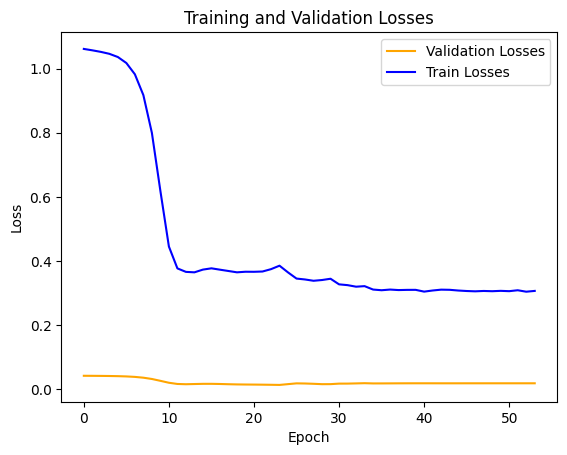

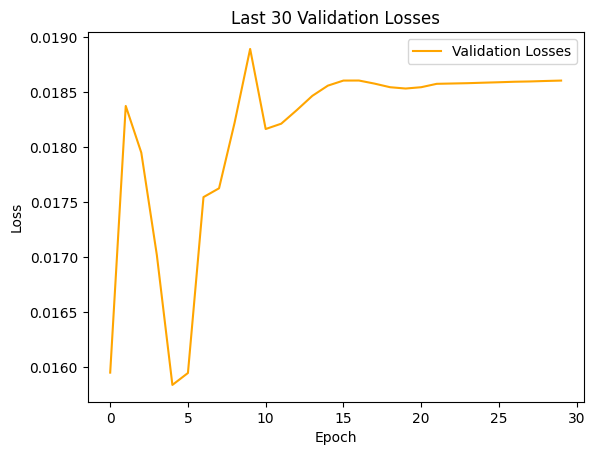

[I 2024-04-17 09:43:48,333] Trial 0 finished with value: 0.018602753313179017 and parameters: {'lag': 180, 'hidden_size_lstm': 64, 'hidden_size_cnn': 192, 'num_layers': 5, 'dropout': 0.6}. Best is trial 0 with value: 0.018602753313179017.


New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 0.6840865612030029 lr: 0.0001
New best validation loss epoch 1 = 0.04139384999871254
New best validation loss epoch 2 = 0.04107953608036041
New best validation loss epoch 3 = 0.040665652602910995
New best validation loss epoch 4 = 0.040063776075839996
New best validation loss epoch 5 = 0.03907587006688118
New best validation loss epoch 6 = 0.03732161596417427
New best validation loss epoch 7 = 0.034192513674497604
New best validation loss epoch 8 = 0.028706572949886322
New best validation loss epoch 9 = 0.02153054252266884
Epoch 10/500 train Loss 0.33472248911857605 lr: 0.0001
Epoch 20/500 train Loss 0.17577004432678223 lr: 1e-05
Epoch 30/500 train Loss 0.1769232451915741 lr: 1e-05
early stopping in epoch = 39


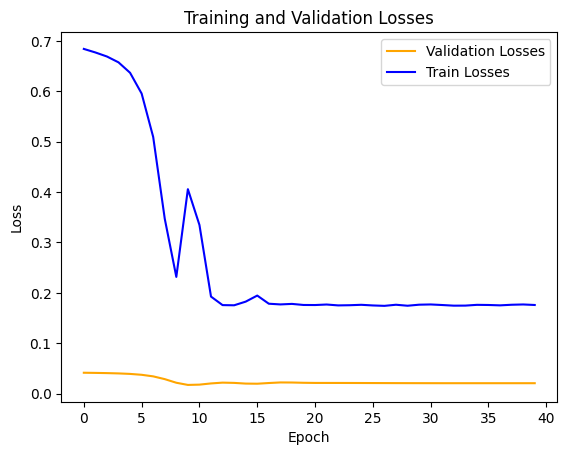

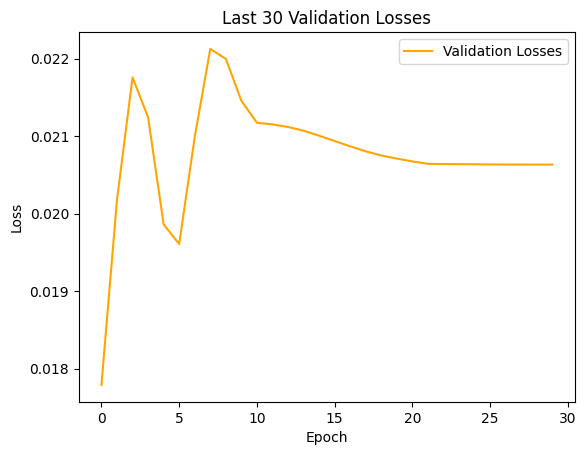

[I 2024-04-17 09:44:53,139] Trial 1 finished with value: 0.020633844978103638 and parameters: {'lag': 720, 'hidden_size_lstm': 128, 'hidden_size_cnn': 64, 'num_layers': 5, 'dropout': 0.4}. Best is trial 0 with value: 0.018602753313179017.


New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 0.6845394372940063 lr: 0.0001
New best validation loss epoch 1 = 0.04157727584242821
New best validation loss epoch 2 = 0.04135653004050255
New best validation loss epoch 3 = 0.04105382785201073
New best validation loss epoch 4 = 0.04059325531125069
New best validation loss epoch 5 = 0.039717331528663635
New best validation loss epoch 6 = 0.03784417361021042
New best validation loss epoch 7 = 0.033870648592710495
Epoch 10/500 train Loss 0.20538611710071564 lr: 0.0001
New best validation loss epoch 11 = 0.032489776611328125
New best validation loss epoch 12 = 0.0323706716299057
Epoch 20/500 train Loss 0.18467722833156586 lr: 0.0001
New best validation loss epoch 21 = 0.032287076115608215
New best validation loss epoch 22 = 0.032239850610494614
New best validation loss epoch 23 = 0.032186947762966156
New best validation loss epoch 24 = 0.032055195420980453
New best validation loss epoch 25 = 0.03172522038221359
New best valida

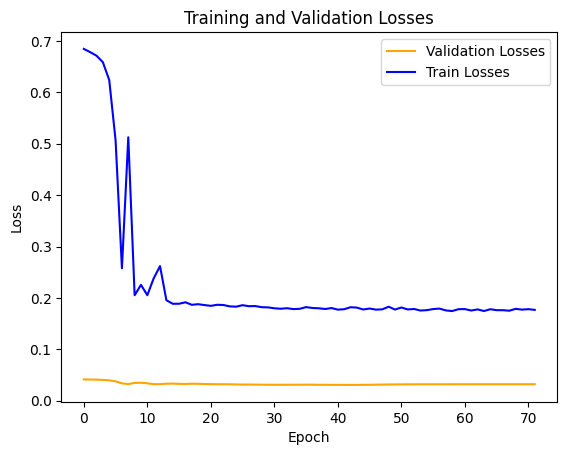

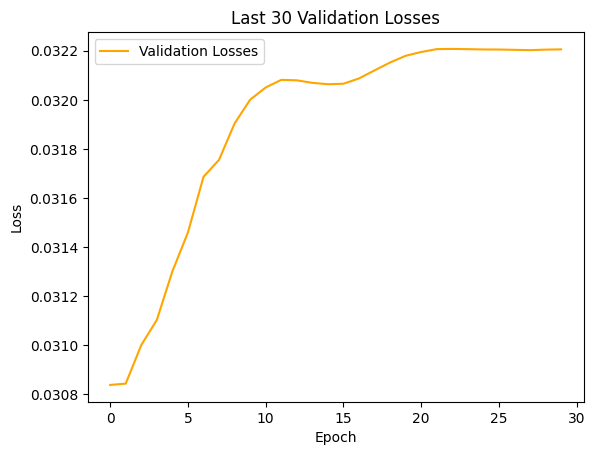

[I 2024-04-17 09:49:36,261] Trial 2 finished with value: 0.032204661509017934 and parameters: {'lag': 720, 'hidden_size_lstm': 448, 'hidden_size_cnn': 48, 'num_layers': 6, 'dropout': 0.7000000000000001}. Best is trial 0 with value: 0.018602753313179017.


New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 0.7963863015174866 lr: 0.0001
New best validation loss epoch 1 = 0.04101404920220375
New best validation loss epoch 2 = 0.04087770730257034
New best validation loss epoch 3 = 0.0407063364982605
New best validation loss epoch 4 = 0.04051680862903595
New best validation loss epoch 5 = 0.04026065766811371
New best validation loss epoch 6 = 0.039813775569200516
New best validation loss epoch 7 = 0.038840293884277344
New best validation loss epoch 8 = 0.03676597401499748
Epoch 10/500 train Loss 0.2365460991859436 lr: 0.0001
Epoch 20/500 train Loss 0.21750058233737946 lr: 1e-05
Epoch 30/500 train Loss 0.21665145456790924 lr: 1.0000000000000002e-06
early stopping in epoch = 38


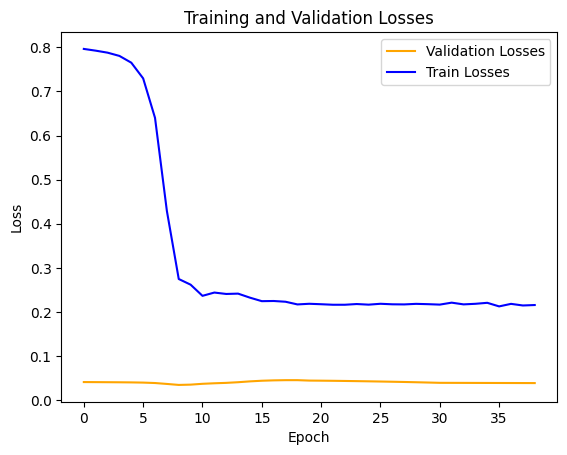

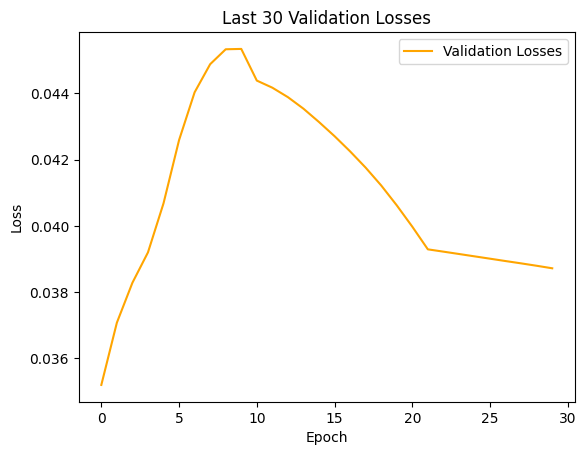

[I 2024-04-17 09:50:53,455] Trial 3 finished with value: 0.03879444613121032 and parameters: {'lag': 545, 'hidden_size_lstm': 320, 'hidden_size_cnn': 240, 'num_layers': 2, 'dropout': 0.7000000000000001}. Best is trial 0 with value: 0.018602753313179017.


New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 0.9539695382118225 lr: 0.0001
New best validation loss epoch 1 = 0.04164666682481766
New best validation loss epoch 2 = 0.0415508970618248
New best validation loss epoch 3 = 0.041412271559238434
New best validation loss epoch 4 = 0.04125484451651573
New best validation loss epoch 5 = 0.04108351469039917
New best validation loss epoch 6 = 0.04090796411037445
New best validation loss epoch 7 = 0.040727317333221436
New best validation loss epoch 8 = 0.04054379463195801
New best validation loss epoch 9 = 0.04035664349794388
New best validation loss epoch 10 = 0.04016980156302452
Epoch 10/500 train Loss 0.868106484413147 lr: 0.0001
Epoch 20/500 train Loss 0.43403753638267517 lr: 0.0001


[W 2024-04-17 09:51:38,807] Trial 4 failed with parameters: {'lag': 365, 'hidden_size_lstm': 256, 'hidden_size_cnn': 16, 'num_layers': 2, 'dropout': 0.1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/utils.py", line 303, in objective
    train(model, dataloader, X_val.unsqueeze(0), torch.tensor(y_val , dtype=torch.float32, device = device), criterion, optimizer, epochs=500)
  File "/utils.py", line 176, in train
    loss.backward()
  File "/opt/conda/lib/python3.10/site-packages/torch/_tensor.py", line 522, in backward
    torch.autograd.backward(
  File "/opt/conda/lib/python3.10/site-packages/torch/autograd/__init__.py", line 266, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt
[W 2024-04-17 09:51:38,811] Trial 4 failed wi

In [2]:
import os

def save_best_model(study, trial):
    if study.best_trial.number == trial.number:
        os.rename("model_weights.pth", "best_model_weights.pth")

# pruner = optuna.pruners.SuccessiveHalvingPruner()
study = optuna.create_study(direction='minimize', study_name = "ResidualConvLSTM forecast finetuning")
study.optimize(objective, n_trials=50, callbacks=[save_best_model])

In [ ]:
best_params = study.best_params
best_params

In [2]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import optuna
from sklearn.metrics import mean_absolute_error

In [17]:
model = LSTM(input_size = best_params["lag"]*8, 
            hidden_size = best_params["hidden_size"],
            num_layers = best_params["num_layers"],
            dropout = best_params["dropout"])   

In [8]:
lag = 365*2
hidden_size_cnn = 16
hidden_size_lstm = 128
num_layers = 3
dropout = 0.6
learning_rate = 0.005
model = ResidualConvLSTM(lag , hidden_size_cnn, hidden_size_lstm , num_layers, dropout)

In [9]:
_, X_test, _, y_test = create_data(df, lags=lag, steps = 99, y_columns=['6'], test_size=0)
X_train = X_test
y_train = y_test

dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)

x_forecaste = create_lags(df, lags=lag-1).iloc[-2]
x_forecaste = torch.tensor(x_forecaste.to_numpy(), dtype=torch.float32, device = device)
x_forecaste = x_forecaste.unsqueeze(0).unsqueeze(0)

y_true = df['6'].iloc[-1].to_numpy()

New best validation loss epoch 0 = inf
Epoch 0/500 train Loss 0.662693202495575 lr: 0.005
New best validation loss epoch 1 = 0.039751842617988586
New best validation loss epoch 2 = 0.03837577998638153
New best validation loss epoch 6 = 0.03234397619962692
New best validation loss epoch 7 = 0.030421309173107147
Epoch 10/500 train Loss 0.37679523229599 lr: 0.005
New best validation loss epoch 11 = 0.02198030613362789
New best validation loss epoch 12 = 0.01687699742615223
New best validation loss epoch 13 = 0.014648942276835442
Epoch 20/500 train Loss 0.21094386279582977 lr: 0.0025
New best validation loss epoch 21 = 0.01330521423369646
New best validation loss epoch 22 = 0.013251101598143578
New best validation loss epoch 27 = 0.013208475895226002
New best validation loss epoch 28 = 0.01315730158239603
New best validation loss epoch 29 = 0.012977774254977703
Epoch 30/500 train Loss 0.19175226986408234 lr: 0.0025
Epoch 40/500 train Loss 0.17122559249401093 lr: 0.00125
early stopping in e

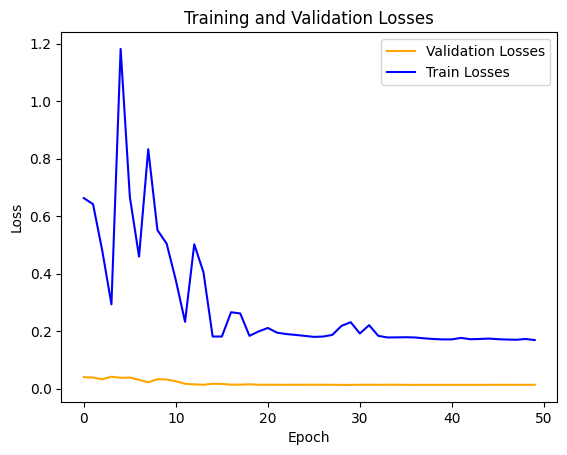

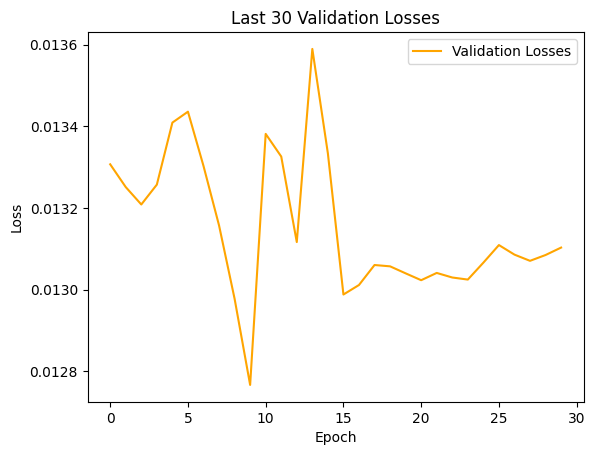

In [10]:
model = model.cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate) #best_params["learning_rate"]
train(model, dataloader, x_forecaste, torch.tensor(y_true , dtype=torch.float32, device = device), criterion, optimizer, epochs=500)

In [ ]:
x_future = x_forecaste.view((8, x_forecaste.shape[1], x_forecaste.shape[2]//8))
y_forecast = predict(model, x_future)
y_forecast = y_forecast.flatten()
y_forecast = (y_forecast * np.sqrt(normlizer.var_[6])) + normlizer.mean_[6]

## save prediction

In [27]:
submission = pd.DataFrame(y_forecast, columns=['Prediction'])
submission['Id'] = range(100)
submission = submission[['Id', 'Prediction']]
submission.to_csv('submission.csv', index=False)

In [ ]:
%env KAGGLE_USERNAME= ***********
%env KAGGLE_KEY= ***********

In [29]:
!kaggle competitions submit -c time-series-classification-part-2new -f submission.csv -m f"LSTM {study.best_params}"

100%|██████████████████████████████████████| 1.30k/1.30k [00:00<00:00, 1.87kB/s]
Successfully submitted to Time Series Classification: Part 2